In [4]:
import tensorflow as tf
from tensorflow.keras import models , layers
import matplotlib.pyplot as plt
import numpy

In [5]:
IMAGE_SIZE = 400
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 40

In [6]:

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Cars" , 
    shuffle = True ,
    image_size = (IMAGE_SIZE , IMAGE_SIZE) ,
    batch_size = BATCH_SIZE
)

Found 9049 files belonging to 18 classes.


In [7]:
class_names = dataset.class_names
class_names


['HYUNDAI_CRETA',
 'HYUNDAI_VENUE',
 'HYUNDAI_VERNA',
 'KIA_SELTOS',
 'MAHINDRA_BOLERO',
 'MAHINDRA_SCORPIO',
 'MAHINDRA_THAR',
 'MAHINDRA_XUV700',
 'MARUTI_BALENO',
 'MARUTI_BREZZA',
 'MARUTI_CIAZ',
 'MARUTI_DZIRE',
 'MARUTI_ERTIGA',
 'MARUTI_SWIFT',
 'TATA_HARRIER',
 'TATA_NEXON',
 'TATA_PUNCH',
 'TOYOTA_FORTUNER']

In [8]:
print(dataset)

<BatchDataset element_spec=(TensorSpec(shape=(None, 400, 400, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [9]:
n_classes = len(dataset)

In [10]:
284 * 32

9088

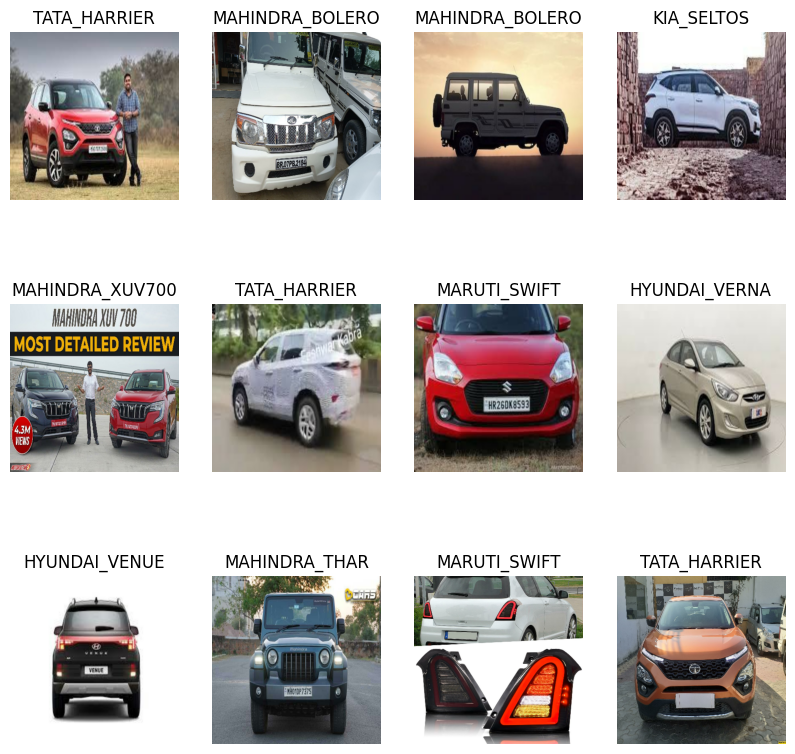

In [11]:
plt.figure(figsize=(10,10))
for image_batch , label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [12]:
def get_dataset_partitions_tf(ds , train_split =0.8 , val_split =0.1 , test_split = 0.1 , shuffle=True , shuffle_size = 10000):
    
    if shuffle:
        ds = ds.shuffle(shuffle)
    
    ds_size = len(ds)
    train_size = int(train_split*ds_size)
    
    val_size = int(val_split*ds_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds , test_ds , val_ds
    

In [13]:
train_ds , val_ds , test_ds = get_dataset_partitions_tf(dataset)

In [14]:
print(len(train_ds) , len(val_ds) , len(test_ds))

226 29 28


In [15]:
train_ds.cache().shuffle(8000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds.cache().shuffle(8000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds.cache().shuffle(8000).prefetch(buffer_size = tf.data.AUTOTUNE)

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 400, 400, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [16]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE , IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

In [17]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2)
])

In [18]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = len(dataset)

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape = input_shape)

In [19]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 398, 398, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 199, 199, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 197, 197, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 98, 98, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 96, 96, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 48, 48, 64)      

In [20]:
model.compile(
    optimizer ='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics= ['accuracy']
)

In [21]:
history = model.fit(
    train_ds,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = val_ds
)

Epoch 1/40
226/226 [==============================] - 79s 288ms/step - loss: 3.1732 - accuracy: 0.0787 - val_loss: 2.8165 - val_accuracy: 0.1173
Epoch 2/40
226/226 [==============================] - 56s 248ms/step - loss: 2.7786 - accuracy: 0.1142 - val_loss: 2.7301 - val_accuracy: 0.1357
Epoch 3/40
226/226 [==============================] - 57s 249ms/step - loss: 2.6316 - accuracy: 0.1709 - val_loss: 2.6253 - val_accuracy: 0.1846
Epoch 4/40
226/226 [==============================] - 58s 254ms/step - loss: 2.3982 - accuracy: 0.2511 - val_loss: 2.3566 - val_accuracy: 0.2693
Epoch 5/40
226/226 [==============================] - 60s 264ms/step - loss: 2.0725 - accuracy: 0.3623 - val_loss: 2.0997 - val_accuracy: 0.3572
Epoch 6/40
226/226 [==============================] - 62s 274ms/step - loss: 1.7581 - accuracy: 0.4610 - val_loss: 2.0081 - val_accuracy: 0.4321
Epoch 7/40
226/226 [==============================] - 59s 259ms/step - loss: 1.3739 - accuracy: 0.5770 - val_loss: 1.9818 - val_ac

In [22]:
scores = model.evaluate(test_ds)

28/28 [==============================] - 18s 95ms/step - loss: 2.3766 - accuracy: 0.7679


In [23]:
import numpy as np
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0)
    
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])),2)
    return predicted_class , confidence

1/1 [==============================] - 0s 23ms/step


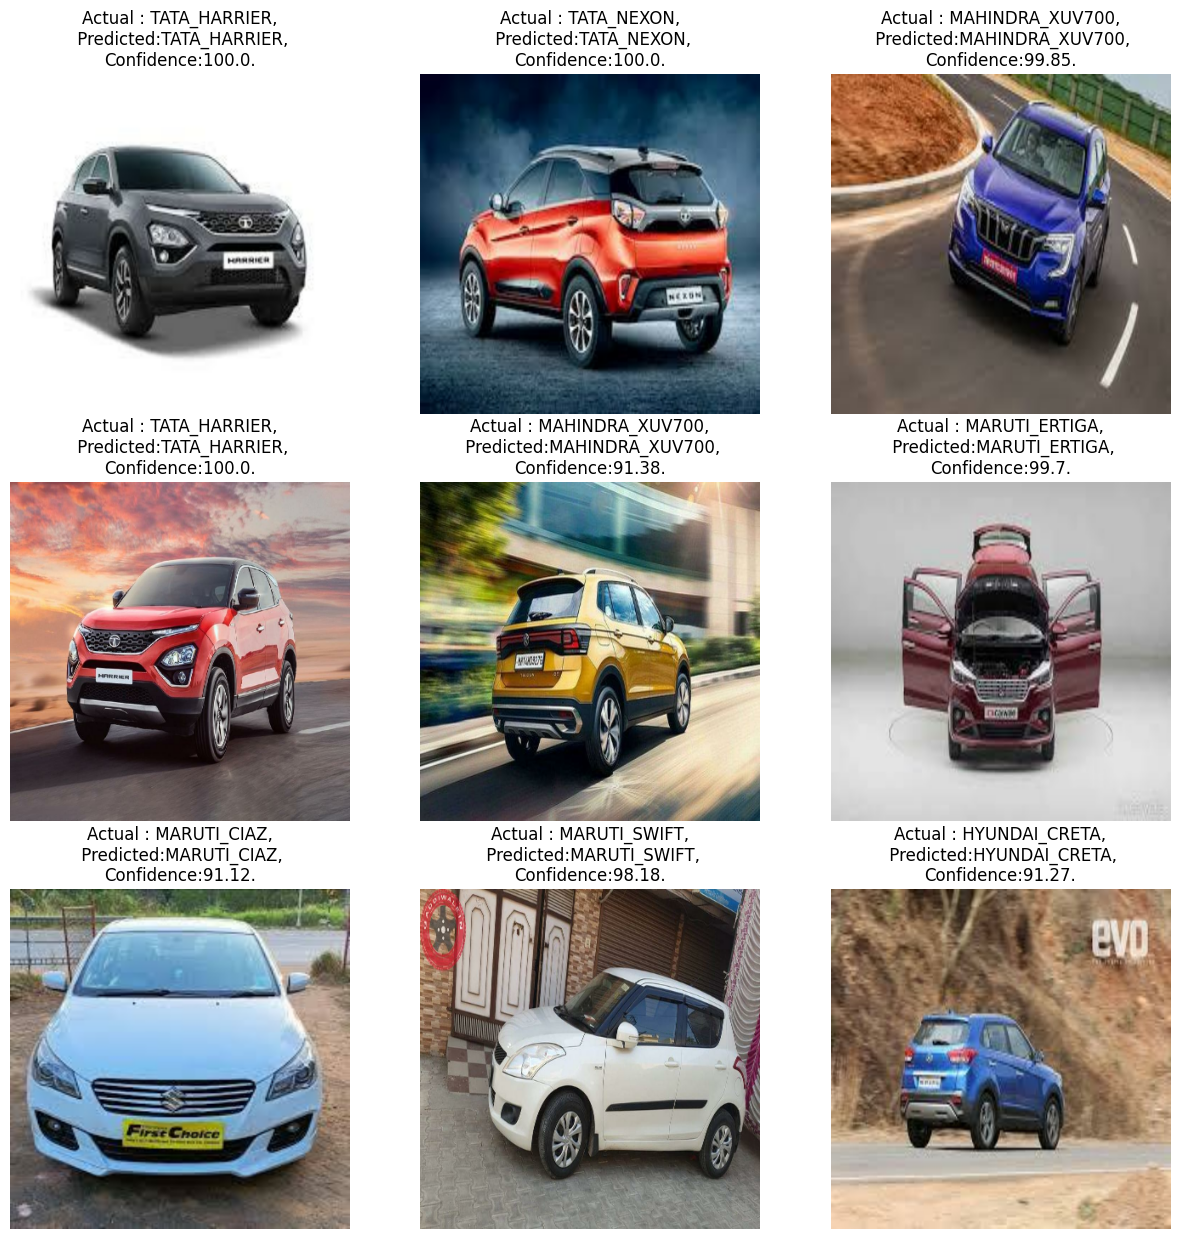

In [24]:
plt.figure(figsize=(15,15))
for images , labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class , confidence = predict(model,images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Actual : {actual_class},\n Predicted:{predicted_class},\nConfidence:{confidence}.")
        plt.axis("off")

In [25]:
# import os
# model_version = 2
# model.save(f"models/{model_version}")

INFO:tensorflow:Assets written to: models/2\assets


INFO:tensorflow:Assets written to: models/2\assets


In [30]:
pip install python-multipart

  Using cached python_multipart-0.0.6-py3-none-any.whl (45 kB)
Note: you may need to restart the kernel to use updated packages.


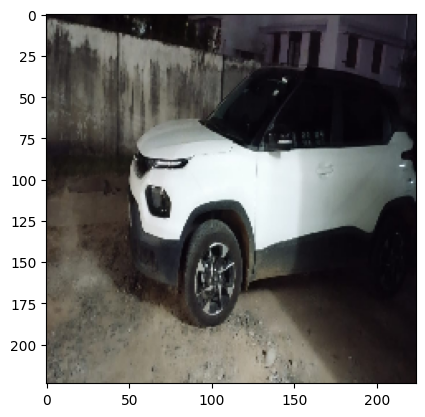

In [43]:
from tensorflow.keras.preprocessing import image
img_path = "C:\\Users\\wwwva\\Car classifier\\exttest\\t1.jpeg"
img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)
plt.show()

In [44]:
from PIL import Image
from numpy import asarray
# asarray() class is used to convert
# PIL images into NumPy arrays
numpyimg = asarray(img)

In [50]:
img_array = tf.keras.preprocessing.image.img_to_array(numpyimg)
img_array = tf.expand_dims(img_array,0)
predictions = model.predict(img_array)
print(predictions)

confidence = round(100*(np.max(predictions[0])),2)
print(predicted_class , confidence)

1/1 [==============================] - 0s 29ms/step
[[5.49038148e-08 1.16097219e-07 6.44145757e-07 2.39576394e-07
  4.10496511e-07 1.94630132e-07 5.09465508e-07 7.24928100e-08
  1.23079090e-07 4.84721108e-09 5.11039699e-09 5.70969716e-10
  4.66267593e-08 2.71418550e-08 9.03040587e-10 6.15952045e-09
  1.91539051e-09 4.22340385e-09 1.97954691e-07 9.63916449e-08
  2.60687276e-08 2.01996708e-09 9.25244503e-09 1.66085087e-07
  7.72727660e-08 1.18867209e-08 1.05939888e-08 7.58747465e-09
  4.35041025e-09 3.35617116e-08 2.15962821e-08 8.83078233e-09
  1.04718234e-08 9.98509768e-06 1.50227140e-06 9.45820432e-07
  7.87245790e-06 9.69642429e-07 1.11418412e-08 3.30280905e-08
  6.93067381e-09 1.22166988e-08 6.99177960e-08 4.61929917e-09
  4.60758081e-08 1.07961959e-07 8.96004959e-09 1.38623308e-08
  2.11930313e-07 9.13044751e-09 9.82799548e-08 1.76819071e-07
  1.11915369e-07 1.91794769e-07 4.42314445e-07 3.24332845e-08
  2.89510478e-08 2.61158082e-08 4.75413799e-07 7.86718513e-09
  3.25170419e-07 1